Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
path_to_folder = "ENPM673"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673


Importing the requied modules

In [ ]:
import cv2
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Finding centroid

Approach
*   Declaring the video file
*   Looping over each frame of the video using while loop
*   Therholding the pixels with intensity greater than 10 to identify the moving object
*   Finding the corner points of the rectangle by sorting the x and y coordinates of the moving pixels list and storing the first and last values from the list
*   Finding the centroid coordinates by using the formula
        (x,y) = (x2 + x1)/2, (y2+y1)/2








In [ ]:
#  capturing the video file
vid_capture = cv2.VideoCapture('Proj_1/object_tracking.mp4')
# getting a random frame from the video
middle_frame  = int(vid_capture.get(cv2.CAP_PROP_FRAME_COUNT)/3)
# creating empty list to store centroid coordinates
centroid_x = []
centroid_y = []
count = 0
# looping over the video
while True:
    # capturing individual frames
    ret, img = vid_capture.read()
    if not ret:
        break
    # capturing a random frame
    if count == middle_frame:
        random_frame = img
    #  converting the frames from bgr to gray scale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    i = 0
    j = 0
    x_cord = []
    y_cord = []
    # therholding each pixel by storing the pixels with intensity greater than 10
    y_cord, x_cord = np.where(img < 10)
    # checking if a pixel detected
    if len(x_cord)>0:
      # sorting the list
      x_cord.sort()
      y_cord.sort()
      # using centroid formula by using the first and last points to get the corners
      centre = [int((x_cord[-1]+x_cord[0])/2), int((y_cord[-1]+y_cord[0])/2)]
      # storing the centroid coordinates
      centroid_x.append(centre[0])
      centroid_y.append(centre[1])
      count+=1
cv2.destroyAllWindows()
vid_capture.release()

Least square method
1. Solving the equations to find the unknowns a, b, c
*   n(a)+b(sum_x)+c(sum_x_sq) = sum_y
*   a(sum_x)+b(sum_x_sq)+c(sum_x_cub) =  sum_xy
*   a(sum_x_sq)+b(sum_x_cub)+c(sum_x_fourth) = sum_x_sq_y

2. Substituting the unknowns in the least square formula
          y = a + b(x) + c(x_sq)

3. Finding the y values for the corresponding x values and appending them to a list



In [ ]:
# declaring the unkowns as symbols
a, b, c = sp.symbols('a, b, c')
n = len(centroid_x)
# finding the variables requied for solving the quation
arr_x = np.array(centroid_x)
arr_y = np.array(centroid_y)
sum_x = np.sum(arr_x)
sum_y = np.sum(arr_y)
sum_xy = np.sum(arr_x*arr_y)
sum_x_sq = np.sum(arr_x**2)
sum_x_cub = np.sum(arr_x**3)
sum_x_fourth = np.sum(arr_x**4)
sum_x_sq_y = np.sum((arr_x**2)*arr_y)
# declaring the equations
eq1 = sp.Eq(n*a+b*sum_x+c*sum_x_sq, sum_y)
eq2 = sp.Eq(a*sum_x+b*sum_x_sq+c*sum_x_cub, sum_xy)
eq3 = sp.Eq(a*sum_x_sq+b*sum_x_cub+c*sum_x_fourth, sum_x_sq_y)
# solving the equations
sol= sp.solve((eq1, eq2, eq3), (a, b, c))
alpha1 = (sol[a])
alpha2 = (sol[b])
alpha3 = (sol[c])
curve_y = []
# finding the y values for the corresponding x values and appending them to a list
for i in centroid_x:
  x = i
  y = alpha1+alpha2*x+alpha3*(x**2)
  curve_y.append(y)


Finding the y axis value for calculated equation, for x axis value 1000

In [ ]:
y = alpha1+alpha2*1000+alpha3*(1000**2)
print("for x = 1000 y = ", float(y))

for x = 1000 y =  388.30047573165547


Plotting
*   Plotting a random frame from the video
*   Scatter plotting the centroid coordinates
*   Plotting the curve generated by least square method



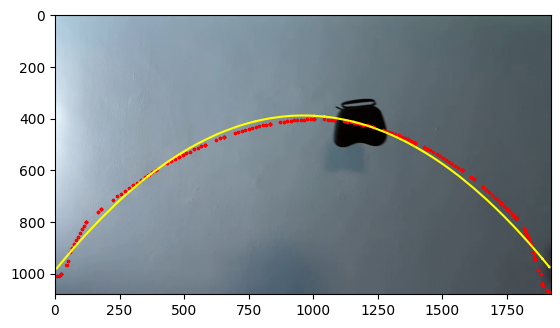

In [ ]:
# plotting the image, centroid points and the curve using matplotlib
imgplot = plt.imshow(random_frame)
plt.scatter(centroid_x, centroid_y, color="red", s = 2)
plt.plot(centroid_x, curve_y, color="yellow")
plt.show()

Result
*   The curve from the least square method is obtained by minimising the vertical displacement from the centroid t0 the curve
*   The curve is generated bu minimising the square vertical distance between the centroid to the point on the curve
*   Since least square method accounts for only the vertical hight it might not be accurate as other curve fitting methods





